## Compare BA and climatology in different years

### compare BA in different years

[ 3.14682409  2.77200915  3.16489538  2.18358917  2.60215057  2.00782937
  1.93585375  1.24647443  3.2723364   2.13411561  2.2958866   4.61775795
  3.94697233  4.06909869  1.29794087  4.02347544  2.40073495  1.63787085
  0.92446096  4.60661334  1.70500939 12.89228334]
3.1310992107138516
2.376953882945454


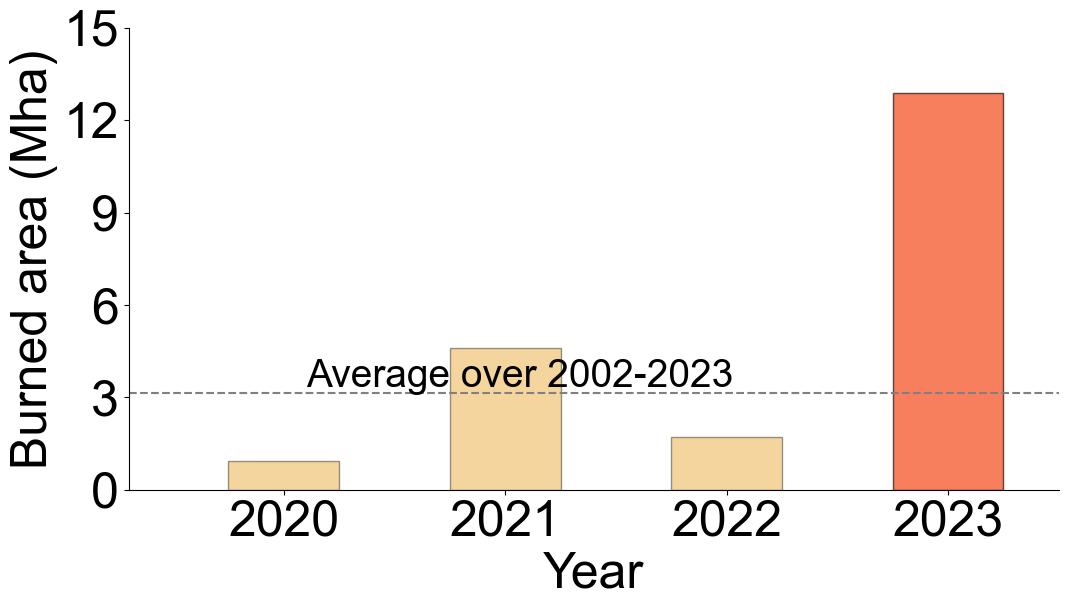

In [5]:
import xarray
import rioxarray
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import os


if __name__ == '__main__':
    workkDir = 'D:/wildfire/hisCanadafire/hisburn_reproj_refCA_Forest_Fires_2023'
    os.chdir(workkDir)
    years = np.arange(2002, 2023, 1)
    fn23BA = 'D:/wildfire/23Canandafire/raw_Jan2Nov_BA/burned_area_2023_clip_raw_proj2NAD.tif'
    
    BA_count_ls = []
    # history fire
    for year in years:
        fn = 'burned_area_' + str(year) + '_annual_reproj.tif'
        ds = rioxarray.open_rasterio(fn)
        nodata_value = ds.rio.nodata
        # 删除空值以及nodata值
        ds = ds.where(ds > 0)
        ds = ds.where(ds != nodata_value)
        # 输出数据类型
        #print(ds.dtype)
        # 统计大于0的像元个数
        BA_num = ds.where(ds > 0).count(dim=['x', 'y'])
        BA_num = BA_num.values[0]
        BA_count_ls.append(BA_num)

    # 23fire
    ds23BA = rioxarray.open_rasterio(fn23BA)
    nodata_value = ds23BA.rio.nodata
    ds23BA = ds23BA.where(ds23BA > 0)
    ds23BA = ds23BA.where(ds23BA != nodata_value)
    BA23_num = ds23BA.where(ds23BA > 0).count(dim=['x', 'y']).values[0] 
    BA_count_ls.append(BA23_num)
    # 转为面积平方公里
    BA_area_arr = np.array(BA_count_ls)
    # 修改数据类型为int64
    BA_area_arr = BA_area_arr.astype(np.int64)
    # 转为万平方公里
    BA_area_arr = BA_area_arr * 439.8668316 * 439.8668316 / 1000000 / 10000
    print(BA_area_arr)
    print(np.mean(BA_area_arr))
    print(np.std(BA_area_arr))

    # 统计所有年份的烧毁面积平均值和标准差
    BA_mean = BA_area_arr.mean()
    BA_std = BA_area_arr.std()
    all_BA = BA_area_arr
    # x轴
    years = [2020, 2021, 2022, 2023]
    # convert to array
    years = np.array(years)
    BA_4years = all_BA[-4:]
    # 绘制柱状图
    # 横坐标为年份，年份为整数
    years = years.astype(np.int16)
    fig, ax = plt.subplots(figsize=(12, 6))
    #fig.patch.set_visible(False)
    fig.patch.set_alpha(0)
    ax.patch.set_alpha(0)
    plt.rcParams['font.sans-serif'] = ['Arial']
    plt.rcParams['font.size'] = 36

    ax.bar(years, BA_4years, width=0.5, color='#e4970a',alpha=0.4,edgecolor='black')
    ax.bar(2023, BA23_num * 439.8668316 * 439.8668316 / 1000000 / 10000, width=0.5, color='#ff0000',alpha=0.4,edgecolor='black')
    # 添加一条水平虚线，表示历史平均值
    ax.axhline(y=BA_mean, ls='--', color='grey')
    # 添加平均值标签
    ax.text(2020.1, BA_mean+0.2, 'Average over 2002-2023', fontsize=28, )

    # 添加1倍标准差
    #plt.axhline(y=BA_mean+BA_std, ls='--', color='k')
    #plt.axhline(y=BA_mean-BA_std, ls='--', color='k')
    # 两条线之间填充
    x = np.arange(2019, 2025, 1)
    #plt.fill_between(x, BA_mean-BA_std, BA_mean+BA_std, color='grey', alpha=0.5)
    #ax.axhline(y=BA_mean-BA_std, ls='--', color='silver')
    #ax.text(2021.2, BA_mean-BA_std+0.5, r'-$\sigma$', fontsize=16, color='silver')
    # 标准差标签，标准差转义为1 sigma
    #ax.axhline(y=BA_mean+BA_std, ls='--', color='silver')
    #ax.text(2021.2, BA_mean+BA_std+0.5, r'+$\sigma$', fontsize=16, color='silver')
    # 添加两倍标准差
    #plt.axhline(y=BA_mean+2*BA_std, ls='--', color='k')
    #plt.axhline(y=BA_mean-2*BA_std, ls='--', color='k')
    # 两条线之间填充
    #plt.fill_between(x, 0, BA_mean+2*BA_std, color='lightgrey', alpha=0.5)
    #plt.text(2021.2, BA_mean+2*BA_std+0.5, r'+$2\sigma$', fontsize=16)
    # 设置最小刻度和坐标轴之间没有空白
    ax.set_xlim(2019.3, 2023.5)
    ax.set_ylim(0, 15)
    ax.set_xlabel('Year')
    ax.set_ylabel('Burned area (km$^2$)')
    # 字体大小
    ax.set_xticks(years)
    ax.set_yticks(np.arange(0, 16, 3))
    # 坐标轴标题字体大小
    ax.set_xlabel('Year', fontsize=36)
    ax.set_ylabel('Burned area (Mha)', fontsize=36)
    # 删除右边和上边的边框
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    #plt.show() 
    # 保存图片
    plt.savefig('D:/Documents/Fig/BA_2020_2023_5eco.png', dpi=500, bbox_inches='tight')
    plt.show()


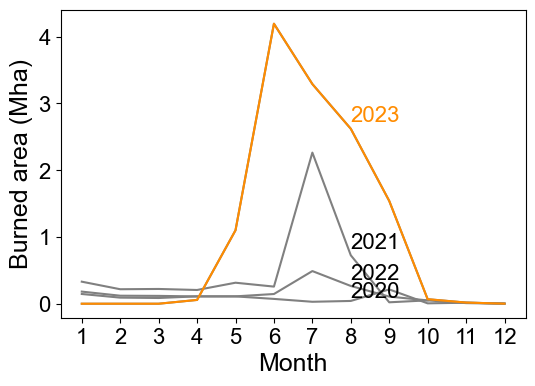

In [1]:
import rioxarray
import numpy as np
import os 
import matplotlib.pyplot as plt
import pandas as pd


if __name__ == '__main__':
    '''
    # 将函数应用到数组
    doy2date = np.vectorize(doy2date)
    workDir = 'D:/wildfire/hisCanadafire/hisburn_reproj_refCA_Forest_Fires_2023'
    os.chdir(workDir)
    BA23fn = 'D:/wildfire/23Canandafire/raw_Jan2Dec_BA/burned_area_2023_clip_raw_proj2NAD.tif'

    years = np.arange(2020, 2023, 1)
    BA_df = pd.DataFrame()
    for year in years:
        fn = 'burned_area_' + str(year) + '_annual_reproj.tif'
        ds = rioxarray.open_rasterio(fn)
        # 删除空值
        nodata_value = ds.rio.nodata
        ds = ds.where(ds != nodata_value)
        ds = ds.where(ds > 0)
        # 统计数组中大于0的unique像元的个数
        doy_arr = ds.values.flatten()
        doy_arr = doy_arr[~np.isnan(doy_arr)]
        month_arr = doy2date(year, doy_arr)
        months, count = np.unique(month_arr, return_counts=True)
        # 将year, month, count转为dataframe
        df = pd.DataFrame({'year': year, 'month': months, 'count': count})
        BA_df = pd.concat([BA_df, df])
    # 23fire
    ds23 = rioxarray.open_rasterio(BA23fn)
    ds23 = ds23.where(ds23 > 0)
   
    doy23_arr = ds23.values.flatten()
    doy23_arr = doy23_arr[~np.isnan(doy23_arr)]
    nodata_value = ds23.rio.nodata
    doy23_arr = doy23_arr[doy23_arr != nodata_value]
    month23_arr = doy2date(2023, doy23_arr)
    
    months23, count23 = np.unique(month23_arr, return_counts=True)
    df23 = pd.DataFrame({'year': 2023, 'month': months23, 'count': count23})
    BA_df = pd.concat([BA_df, df23])
    # 将次数转为面积，unit: 10000 km2
    BA_df['area'] = BA_df['count'] * 439.8668316 * 439.8668316 / 1000000 / 10000
    # 保存为csv
    BA_df.to_csv('D:/Wildfire/hisCanadafire/5eco/BA_2020_2023_5eco_sta.csv', index=False)
    # 关闭
    ds.close()
    ds23.close()
    '''
    # 读取csv
    BA_df = pd.read_csv('D:/wildfire/hisCanadafire/5eco/BA_2020_2023_5eco_sta.csv')
    # 绘制动态线图
    # 设置字体为Arial
    plt.rcParams['font.sans-serif'] = ['Arial']
    # 设置图片大小
    plt.figure(figsize=(6, 4))
    years = [2020, 2021, 2022, 2023]
    # 绘制20-22线图
    for year in years:
        df = BA_df[BA_df['year'] == year]
        plt.plot(df['month'], df['area'], label=str(year), color='grey')
        #plt.text(8, df[df['month'] == 8]['area'].values[0]+0.1, str(year), fontsize=16)
    # 绘制23线图
    df23 = BA_df[BA_df['year'] == 2023]
    df22 = BA_df[BA_df['year'] == 2022]
    df21 = BA_df[BA_df['year'] == 2021]
    df20 = BA_df[BA_df['year'] == 2020]
    plt.plot(df23['month'], df23['area'], label='2023', color='darkorange')
    plt.text(8, df23[df23['month'] == 8]['area'].values[0]+0.1, '2023', fontsize=16, color='darkorange')
    plt.text(8, df22[df22['month'] == 8]['area'].values[0]+0.1, '2022', fontsize=16)
    plt.text(8, df21[df21['month'] == 8]['area'].values[0]+0.1, '2021', fontsize=16)
    plt.text(8, df20[df20['month'] == 8]['area'].values[0]+0.05, '2020', fontsize=16)
    # 设置坐标轴标题
    plt.xlabel('Month')
    plt.ylabel('Burned area (Mha)')
    # 设置坐标轴刻度标签
    plt.xticks(np.arange(1, 13, 1))
    # 设置坐标轴字体大小
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    # 设置坐标轴标题字体大小
    plt.xlabel('Month', fontsize=18)
    plt.ylabel('Burned area (Mha)', fontsize=18)
    
    # 保存图片
    plt.savefig('D:/Wildfire/hisCanadafire/5eco/BA_2020_2023_5eco_line.png', dpi=300, bbox_inches='tight')
    plt.show()
    

        


### climate anomoly 数据处理

In [3]:
import xarray as xr
import rioxarray
import os
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.dates as mdates
import pandas as pd

if __name__ == '__main__':
    fire23Path = 'D:/Wildfire/23Canandafire/raw_Jan2Nov_BA/BA_2023_Jan2Nov_5eco_01_degree_BA_fraction.tif'
    fire23ds = rioxarray.open_rasterio(fire23Path)
    fire22Path = 'D:/Wildfire/hisCanadafire/BA_fraction_01degree/burned_area_2022_annual_WGS84_5eco_01_degree_BA_fraction.tif'
    fire22ds = rioxarray.open_rasterio(fire22Path)
    fire21Path = 'D:/Wildfire/hisCanadafire/BA_fraction_01degree/burned_area_2021_annual_WGS84_5eco_01_degree_BA_fraction.tif'
    fire21ds = rioxarray.open_rasterio(fire21Path)
    fire20Path = 'D:/Wildfire/hisCanadafire/BA_fraction_01degree/burned_area_2020_annual_WGS84_5eco_01_degree_BA_fraction.tif'
    fire20ds = rioxarray.open_rasterio(fire20Path)

    fire23_arr = fire23ds.values[0]
    fire22_arr = fire22ds.values[0]
    fire21_arr = fire21ds.values[0]
    fire20_arr = fire20ds.values[0]
    
    # 气候异常
    workDir = 'D:/ERA5/ERA5land_monthly_2000_2023_5eco_extent/climate_input_anomoly'
    os.chdir(workDir)
    t2mfn = 'ERA5land_t2m_200001_202312_5eco_anomoly.nc'
    tpfn = 'ERA5land_tp_200001_202312_5eco_anomoly.nc'
    smfn = 'ERA5land_swvl1_200001_202312_5eco_anomoly.nc'
    vpdfn = 'ERA5land_vpd_200001_202312_5eco_anomoly.nc'
    speiPath = 'D:/ERA5/ERA5land_monthly_2000_2023_5eco_extent/spei_pro/spei_2402/ERA5landn_climgrid_lowres_spei_5eco_spei_gamma_03.nc'
    t2mmaxfn = "ERA5_land_t2mmax_200001_202312_anomoly.nc"
  
    t2mds = xr.open_dataset(t2mfn)
    tpds = xr.open_dataset(tpfn)
    smds = xr.open_dataset(smfn)
    vpdds = xr.open_dataset(vpdfn)
    speids = xr.open_dataset(speiPath)
    t2mmaxds = xr.open_dataset(t2mmaxfn)

    t2mda = t2mds.t2m
    tpda = tpds.tp
    smda = smds.swvl1
    vpda = vpdds.vpd
    speida = speids.spei_gamma_03
    t2mmaxda = t2mmaxds.t2mmax

    t2mda = t2mda.sel(time=slice('2019-01-01', '2023-12-31'))
    tpda = tpda.sel(time=slice('2019-01-01', '2023-12-31'))
    smda = smda.sel(time=slice('2019-01-01', '2023-12-31'))
    vpdda = vpda.sel(time=slice('2019-01-01', '2023-12-31'))
    speida = speida.sel(time=slice('2019-01-01', '2023-12-31'))
    t2mmaxda = t2mmaxda.sel(time=slice('2019-01-01', '2023-12-31'))
    
    # 重采样统一坐标系
    # 获取火灾像素坐标系
    lat_coords = fire23ds.y.values
    lon_coords = fire23ds.x.values

    # 对气候数据进行重采样
    t2mda_resample = t2mda.interp(latitude=lat_coords, longitude=lon_coords)
    tpda_resample = tpda.interp(latitude=lat_coords, longitude=lon_coords)
    smda_resample = smda.interp(latitude=lat_coords, longitude=lon_coords)
    vpdda_resample = vpda.interp(lat=lat_coords, lon=lon_coords)
    speida_resample = speida.interp(lat=lat_coords, lon=lon_coords)
    t2mmaxda_resample = t2mmaxda.interp(lat=lat_coords, lon=lon_coords)
    
    # 交换spei维度顺序
    speida_resample = speida_resample.transpose('time', 'lat', 'lon')
    
    # 绘制23年火灾区域气候异常
    # 选取23年区域
    t2m23 = t2mda_resample.where(fire23_arr > 0)
    # print(t2m23)
     # test
    '''
    t2m_23test = t2m23.sel(time='2020-01-01')
    t2m_23test = t2m_23test.values
    print(t2m_23test.shape)
    print(fire23ds.values[0].shape)
    t2m_23test = np.where(fire23ds.values[0] > 0, t2m_23test, np.nan)
    plt.imshow(t2m_23test)
    plt.legend()
    plt.show()
    '''
    tp23 = tpda_resample.where(fire23_arr > 0)
    sm23 = smda_resample.where(fire23_arr > 0)
    vpd23 = vpdda_resample.where(fire23_arr > 0)
    spei23 = speida_resample.where(fire23_arr > 0)
    t2mmax23 = t2mmaxda_resample.where(fire23_arr > 0)
    
    # 选取22-23数据
    t2m23 = t2m23.sel(time = slice('2022-04-01', '2023-12-31'))
    tp23 = tp23.sel(time = slice('2022-04-01', '2023-12-31'))
    sm23 = sm23.sel(time = slice('2022-04-01', '2023-12-31'))
    vpd23 = vpd23.sel(time = slice('2022-04-01', '2023-12-31'))
    spei23 = spei23.sel(time = slice('2022-04-01', '2023-12-31'))
    t2mmax23 = t2mmax23.sel(time = slice('2022-04-01', '2023-12-31'))
    # 空间平均
    t2m23_mean = t2m23.mean(dim=['latitude', 'longitude'])
    tp23_mean = tp23.mean(dim=['latitude', 'longitude'])
    sm23_mean = sm23.mean(dim=['latitude', 'longitude'])
    vpd23_mean = vpd23.mean(dim=['lat', 'lon'])
    spei23_mean = spei23.mean(dim=['lat', 'lon'])
    t2mmax23_mean = t2mmax23.mean(dim=['lat', 'lon'])
    # 空间标准差
    t2m23_std = t2m23.std(dim=['latitude', 'longitude'])
    tp23_std = tp23.std(dim=['latitude', 'longitude'])
    sm23_std = sm23.std(dim=['latitude', 'longitude'])
    vpd23_std = vpd23.std(dim=['lat', 'lon'])
    spei23_std = spei23.std(dim=['lat', 'lon'])
    t2mmax23_std = t2mmax23.std(dim=['lat', 'lon'])
    
    # 绘制22年火灾区域气候异常
    t2m22 = t2mda_resample.where(fire22_arr > 0)
    tp22 = tpda_resample.where(fire22_arr > 0)
    sm22 = smda_resample.where(fire22_arr > 0)
    vpd22 = vpdda_resample.where(fire22_arr > 0)
    spei22 = speida_resample.where(fire22_arr > 0)
    t2mmax22 = t2mmaxda_resample.where(fire22_arr > 0)
    # 选取21-22数据
    t2m22 = t2m22.sel(time = slice('2021-04-01', '2022-12-31'))
    tp22 = tp22.sel(time = slice('2021-04-01', '2022-12-31'))
    sm22 = sm22.sel(time = slice('2021-04-01', '2022-12-31'))
    vpd22 = vpd22.sel(time = slice('2021-04-01', '2022-12-31'))
    spei22 = spei22.sel(time = slice('2021-04-01', '2022-12-31'))
    t2mmax22 = t2mmax22.sel(time = slice('2021-04-01', '2022-12-31'))
    # 空间平均
    t2m22_mean = t2m22.mean(dim=['latitude', 'longitude'])
    tp22_mean = tp22.mean(dim=['latitude', 'longitude'])
    sm22_mean = sm22.mean(dim=['latitude', 'longitude'])
    vpd22_mean = vpd22.mean(dim=['lat', 'lon'])
    spei22_mean = spei22.mean(dim=['lat', 'lon'])
    t2mmax22_mean = t2mmax22.mean(dim=['lat', 'lon'])
    # std
    t2m22_std = t2m22.std(dim=['latitude', 'longitude'])
    tp22_std = tp22.std(dim=['latitude', 'longitude'])
    sm22_std = sm22.std(dim=['latitude', 'longitude'])
    vpd22_std = vpd22.std(dim=['lat', 'lon'])
    spei22_std = spei22.std(dim=['lat', 'lon'])
    t2mmax22_std = t2mmax22.std(dim=['lat', 'lon'])

    # 绘制21年火灾区域气候异常
    t2m21 = t2mda_resample.where(fire21_arr > 0)
    tp21 = tpda_resample.where(fire21_arr > 0)
    sm21 = smda_resample.where(fire21_arr > 0)
    vpd21 = vpdda_resample.where(fire21_arr > 0)
    spei21 = speida_resample.where(fire21_arr > 0)
    t2mmax21 = t2mmaxda_resample.where(fire21_arr > 0)
    # 选取20-21数据
    t2m21 = t2m21.sel(time = slice('2020-04-01', '2021-12-31'))
    tp21 = tp21.sel(time = slice('2020-04-01', '2021-12-31'))
    sm21 = sm21.sel(time = slice('2020-04-01', '2021-12-31'))
    vpd21 = vpd21.sel(time = slice('2020-04-01', '2021-12-31'))
    spei21 = spei21.sel(time = slice('2020-04-01', '2021-12-31'))
    t2mmax21 = t2mmax21.sel(time = slice('2020-04-01', '2021-12-31'))
    # 空间平均
    t2m21_mean = t2m21.mean(dim=['latitude', 'longitude'])
    tp21_mean = tp21.mean(dim=['latitude', 'longitude'])
    sm21_mean = sm21.mean(dim=['latitude', 'longitude'])
    vpd21_mean = vpd21.mean(dim=['lat', 'lon'])
    spei21_mean = spei21.mean(dim=['lat', 'lon'])
    t2mmax21_mean = t2mmax21.mean(dim=['lat', 'lon'])
    #std
    t2m21_std = t2m21.std(dim=['latitude', 'longitude'])
    tp21_std = tp21.std(dim=['latitude', 'longitude'])
    sm21_std = sm21.std(dim=['latitude', 'longitude'])
    vpd21_std = vpd21.std(dim=['lat', 'lon'])
    spei21_std = spei21.std(dim=['lat', 'lon'])
    t2mmax21_std = t2mmax21.std(dim=['lat', 'lon'])

    # 绘制20年火灾区域气候异常
    t2m20 = t2mda_resample.where(fire20_arr > 0)
    tp20 = tpda_resample.where(fire20_arr > 0)
    sm20 = smda_resample.where(fire20_arr > 0)
    vpd20 = vpdda_resample.where(fire20_arr > 0)
    spei20 = speida_resample.where(fire20_arr > 0)
    t2mmax20 = t2mmaxda_resample.where(fire20_arr > 0)
    # 选取19-20数据
    t2m20 = t2m20.sel(time = slice('2019-04-01', '2020-12-31'))
    tp20 = tp20.sel(time = slice('2019-04-01', '2020-12-31'))
    sm20 = sm20.sel(time = slice('2019-04-01', '2020-12-31'))
    vpd20 = vpd20.sel(time = slice('2019-04-01', '2020-12-31'))
    spei20 = spei20.sel(time = slice('2019-04-01', '2020-12-31'))
    t2mmax20 = t2mmax20.sel(time = slice('2019-04-01', '2020-12-31'))
    # 空间平均
    t2m20_mean = t2m20.mean(dim=['latitude', 'longitude'])
    tp20_mean = tp20.mean(dim=['latitude', 'longitude'])
    sm20_mean = sm20.mean(dim=['latitude', 'longitude'])
    vpd20_mean = vpd20.mean(dim=['lat', 'lon'])
    spei20_mean = spei20.mean(dim=['lat', 'lon'])
    t2mmax20_mean = t2mmax20.mean(dim=['lat', 'lon'])
    # std
    t2m20_std = t2m20.std(dim=['latitude', 'longitude'])
    tp20_std = tp20.std(dim=['latitude', 'longitude'])
    sm20_std = sm20.std(dim=['latitude', 'longitude'])
    vpd20_std = vpd20.std(dim=['lat', 'lon'])
    spei20_std = spei20.std(dim=['lat', 'lon'])
    t2mmax20_std = t2mmax20.std(dim=['lat', 'lon'])

    # fireseason 统计
    years = [2020, 2021, 2022, 2023]
    climate_fs_mean = []
    climate_fs_std = []
    for year in years:
        fire_area = eval('fire'+str(year)[2:]+'_arr')
        t2m_temp = t2mda_resample.where(fire_area > 0)
        tp_temp = tpda_resample.where(fire_area > 0)
        sm_temp = smda_resample.where(fire_area > 0)
        vpd_temp = vpdda_resample.where(fire_area > 0)
        spei_temp = speida_resample.where(fire_area > 0)
        t2mmax_temp = t2mmaxda_resample.where(fire_area > 0)

        # 选取时间
        start = str(year)+'-04-01'
        end = str(year)+'-10-31'
        t2m_fs = t2m_temp.sel(time = slice(start, end))
        tp_fs = tp_temp.sel(time = slice(start, end))
        sm_fs = sm_temp.sel(time = slice(start, end))
        vpd_fs = vpd_temp.sel(time = slice(start, end))
        spei_fs = spei_temp.sel(time = slice(start, end))
        t2mmax_fs = t2mmax_temp.sel(time = slice(start, end))

        # 空间平均
        t2m_fs_mean = t2m_fs.mean(dim=['latitude', 'longitude'])
        tp_fs_mean = tp_fs.mean(dim=['latitude', 'longitude'])
        sm_fs_mean = sm_fs.mean(dim=['latitude', 'longitude'])
        vpd_fs_mean = vpd_fs.mean(dim=['lat', 'lon'])
        spei_fs_mean = spei_fs.mean(dim=['lat', 'lon'])
        t2mmax_fs_mean = t2mmax_fs.mean(dim=['lat', 'lon'])

        # std 时间
        t2m_fs_std = t2m_fs_mean.std(dim='time')
        tp_fs_std = tp_fs_mean.std(dim='time')
        sm_fs_std = sm_fs_mean.std(dim='time')
        vpd_fs_std = vpd_fs_mean.std(dim='time')
        spei_fs_std = spei_fs_mean.std(dim='time')
        t2mmax_fs_std = t2mmax_fs_mean.std(dim='time')   

        # 时间平均
        t2m_fs_mean = t2m_fs_mean.mean(dim='time')
        tp_fs_mean = tp_fs_mean.mean(dim='time')
        sm_fs_mean = sm_fs_mean.mean(dim='time')
        vpd_fs_mean = vpd_fs_mean.mean(dim='time')
        spei_fs_mean = spei_fs_mean.mean(dim='time')
        t2mmax_fs_mean = t2mmax_fs_mean.mean(dim='time')

         

        # 保存
        climate_fs_mean.append([year, t2m_fs_mean.values, tp_fs_mean.values, sm_fs_mean.values, vpd_fs_mean.values, spei_fs_mean.values, t2mmax_fs_mean.values])
        climate_fs_std.append([year, t2m_fs_std.values, tp_fs_std.values, sm_fs_std.values, vpd_fs_std.values, spei_fs_std.values, t2mmax_fs_std.values])
    # 保存为dataframe
    climate_fs_mean_df = pd.DataFrame(climate_fs_mean, columns=['year', 't2m', 'tp', 'sm', 'vpd', 'spei', 't2mmax'])
    climate_fs_std_df = pd.DataFrame(climate_fs_std, columns=['year', 't2m', 'tp', 'sm', 'vpd', 'spei', 't2mmax'])


    # 统计历史火灾数据
    climate_his_mean = []
    climate_his_std = []
    months = [11, 12,1,2,3,4,5,6,7,8,9,10]
    for i in months:
        t2m_arr_hist = np.array([])
        tp_arr_hist = np.array([])
        sm_arr_hist = np.array([])
        vpd_arr_hist = np.array([])
        spei_arr_hist = np.array([])
        t2mmax_arr_hist = np.array([])
        for year in [2020, 2021, 2022]:
            fire = eval('fire'+str(year)[2:]+'_arr')
            if i>10:
                sel_time = str(year-1)+'-'+str(i)
            else:
                sel_time = str(year)+'-'+str(i).zfill(2)
            # 筛选时间
            t2m = t2mda_resample.sel(time=sel_time)
            # 筛选火灾区域
            t2m = t2m.where(fire > 0)
            #拉伸到一维
            t2m = t2m.values.flatten()
            t2m = t2m[~np.isnan(t2m)]

            tp = tpda_resample.sel(time=sel_time)
            tp = tp.where(fire > 0)
            tp = tp.values.flatten()
            tp = tp[~np.isnan(tp)]

            sm = smda_resample.sel(time=sel_time)
            sm = sm.where(fire > 0)
            sm = sm.values.flatten()
            sm = sm[~np.isnan(sm)]

            vpd = vpdda_resample.sel(time=sel_time)
            vpd = vpd.where(fire > 0)
            vpd = vpd.values.flatten()
            vpd = vpd[~np.isnan(vpd)]

            spei = speida_resample.sel(time=sel_time)
            spei = spei.where(fire > 0)
            spei = spei.values.flatten()
            spei = spei[~np.isnan(spei)]

            t2mmax = t2mmaxda_resample.sel(time=sel_time)
            t2mmax = t2mmax.where(fire > 0)
            t2mmax = t2mmax.values.flatten()
            t2mmax = t2mmax[~np.isnan(t2mmax)]

            t2m_arr_hist = np.append(t2m_arr_hist, t2m)
            tp_arr_hist = np.append(tp_arr_hist, tp)
            sm_arr_hist = np.append(sm_arr_hist, sm)
            vpd_arr_hist = np.append(vpd_arr_hist, vpd)
            spei_arr_hist = np.append(spei_arr_hist, spei)
            t2mmax_arr_hist = np.append(t2mmax_arr_hist, t2mmax)
        
        # 计算均值和标准差
        t2m_mean = np.mean(t2m_arr_hist)
        tp_mean = np.mean(tp_arr_hist)
        sm_mean = np.mean(sm_arr_hist)
        vpd_mean = np.mean(vpd_arr_hist)
        spei_mean = np.mean(spei_arr_hist)
        t2mmax_mean = np.mean(t2mmax_arr_hist)
        t2m_std = np.std(t2m_arr_hist)
        tp_std = np.std(tp_arr_hist)
        sm_std = np.std(sm_arr_hist)
        vpd_std = np.std(vpd_arr_hist)
        spei_std = np.std(spei_arr_hist)
        t2mmax_std = np.std(t2mmax_arr_hist)
        climate_his_mean.append([i, t2m_mean, tp_mean, sm_mean, vpd_mean, spei_mean, t2mmax_mean])
        climate_his_std.append([i, t2m_std, tp_std, sm_std, vpd_std, spei_std, t2mmax_std])
    # 保存为dataframe
    climate_his_mean_df = pd.DataFrame(climate_his_mean, columns=['month', 't2m', 'tp', 'sm', 'vpd', 'spei', 't2mmax'])
    climate_his_std_df = pd.DataFrame(climate_his_std, columns=['month', 't2m', 'tp', 'sm', 'vpd', 'spei', 't2mmax'])

    # 导出为csv
    climate_anomaly_dir = 'D:/Documents/outfile/climate_anomaly_5eco'
    climate_anomaly_20_mean_df = pd.DataFrame()
    climate_anomaly_21_mean_df = pd.DataFrame()
    climate_anomaly_22_mean_df = pd.DataFrame()
    climate_anomaly_23_mean_df = pd.DataFrame()
    climate_anomaly_20_std_df = pd.DataFrame()
    climate_anomaly_21_std_df = pd.DataFrame()
    climate_anomaly_22_std_df = pd.DataFrame()
    climate_anomaly_23_std_df = pd.DataFrame()
    # 20年
    climate_anomaly_20_mean_df['time'] = t2m20_mean.time.values
    climate_anomaly_20_mean_df['t2m'] = 0.0
    climate_anomaly_20_mean_df['tp'] = 0.0
    climate_anomaly_20_mean_df['sm'] = 0.0
    climate_anomaly_20_mean_df['vpd'] = 0.0
    climate_anomaly_20_mean_df['spei'] = 0.0
    climate_anomaly_20_mean_df['t2mmax'] = 0.0
    climate_anomaly_20_mean_df['month'] = climate_anomaly_20_mean_df['time'].dt.month
    climate_anomaly_20_std_df = climate_anomaly_20_mean_df.copy()
    # 根据时间筛选对应的气候变量
    for index, row in climate_anomaly_20_mean_df.iterrows():
        # t2m
        timestamp = row['time']
        climate_anomaly_20_mean_df.loc[index, 't2m'] = t2m20_mean.sel(time=timestamp).values
        climate_anomaly_20_mean_df.loc[index, 'tp'] = tp20_mean.sel(time=timestamp).values
        climate_anomaly_20_mean_df.loc[index, 'sm'] = sm20_mean.sel(time=timestamp).values
        climate_anomaly_20_mean_df.loc[index, 'vpd'] = vpd20_mean.sel(time=timestamp).values
        climate_anomaly_20_mean_df.loc[index, 'spei'] = spei20_mean.sel(time=timestamp).values
        climate_anomaly_20_mean_df.loc[index, 't2mmax'] = t2mmax20_mean.sel(time=timestamp).values
        #std
        climate_anomaly_20_std_df.loc[index, 't2m'] = t2m20_std.sel(time=timestamp).values
        climate_anomaly_20_std_df.loc[index, 'tp'] = tp20_std.sel(time=timestamp).values
        climate_anomaly_20_std_df.loc[index, 'sm'] = sm20_std.sel(time=timestamp).values
        climate_anomaly_20_std_df.loc[index, 'vpd'] = vpd20_std.sel(time=timestamp).values
        climate_anomaly_20_std_df.loc[index, 'spei'] = spei20_std.sel(time=timestamp).values
        climate_anomaly_20_std_df.loc[index, 't2mmax'] = t2mmax20_std.sel(time=timestamp).values
    
    # 21年
    climate_anomaly_21_mean_df['time'] = t2m21_mean.time.values
    climate_anomaly_21_mean_df['t2m'] = 0.0
    climate_anomaly_21_mean_df['tp'] = 0.0
    climate_anomaly_21_mean_df['sm'] = 0.0
    climate_anomaly_21_mean_df['vpd'] = 0.0
    climate_anomaly_21_mean_df['spei'] = 0.0
    climate_anomaly_21_mean_df['t2mmax'] = 0.0
    climate_anomaly_21_mean_df['month'] = climate_anomaly_21_mean_df['time'].dt.month
    climate_anomaly_21_std_df = climate_anomaly_21_mean_df.copy()
    # 根据时间筛选对应的气候变量
    for index, row in climate_anomaly_21_mean_df.iterrows():
        # t2m
        timestamp = row['time']
        climate_anomaly_21_mean_df.loc[index, 't2m'] = t2m21_mean.sel(time=timestamp).values
        climate_anomaly_21_mean_df.loc[index, 'tp'] = tp21_mean.sel(time=timestamp).values
        climate_anomaly_21_mean_df.loc[index, 'sm'] = sm21_mean.sel(time=timestamp).values
        climate_anomaly_21_mean_df.loc[index, 'vpd'] = vpd21_mean.sel(time=timestamp).values
        climate_anomaly_21_mean_df.loc[index, 'spei'] = spei21_mean.sel(time=timestamp).values
        climate_anomaly_21_mean_df.loc[index, 't2mmax'] = t2mmax21_mean.sel(time=timestamp).values
        #std
        climate_anomaly_21_std_df.loc[index, 't2m'] = t2m21_std.sel(time=timestamp).values
        climate_anomaly_21_std_df.loc[index, 'tp'] = tp21_std.sel(time=timestamp).values
        climate_anomaly_21_std_df.loc[index, 'sm'] = sm21_std.sel(time=timestamp).values
        climate_anomaly_21_std_df.loc[index, 'vpd'] = vpd21_std.sel(time=timestamp).values
        climate_anomaly_21_std_df.loc[index, 'spei'] = spei21_std.sel(time=timestamp).values
        climate_anomaly_21_std_df.loc[index, 't2mmax'] = t2mmax21_std.sel(time=timestamp).values
    
    # 22年
    climate_anomaly_22_mean_df['time'] = t2m22_mean.time.values
    climate_anomaly_22_mean_df['t2m'] = 0.0
    climate_anomaly_22_mean_df['tp'] = 0.0
    climate_anomaly_22_mean_df['sm'] = 0.0
    climate_anomaly_22_mean_df['vpd'] = 0.0
    climate_anomaly_22_mean_df['spei'] = 0.0
    climate_anomaly_22_mean_df['t2mmax'] = 0.0
    climate_anomaly_22_mean_df['month'] = climate_anomaly_22_mean_df['time'].dt.month
    climate_anomaly_22_std_df = climate_anomaly_22_mean_df.copy()
    # 根据时间筛选对应的气候变量
    for index, row in climate_anomaly_22_mean_df.iterrows():
        # t2m
        timestamp = row['time']
        climate_anomaly_22_mean_df.loc[index, 't2m'] = t2m22_mean.sel(time=timestamp).values
        climate_anomaly_22_mean_df.loc[index, 'tp'] = tp22_mean.sel(time=timestamp).values
        climate_anomaly_22_mean_df.loc[index, 'sm'] = sm22_mean.sel(time=timestamp).values
        climate_anomaly_22_mean_df.loc[index, 'vpd'] = vpd22_mean.sel(time=timestamp).values
        climate_anomaly_22_mean_df.loc[index, 'spei'] = spei22_mean.sel(time=timestamp).values
        climate_anomaly_22_mean_df.loc[index, 't2mmax'] = t2mmax22_mean.sel(time=timestamp).values
        #std
        climate_anomaly_22_std_df.loc[index, 't2m'] = t2m22_std.sel(time=timestamp).values
        climate_anomaly_22_std_df.loc[index, 'tp'] = tp22_std.sel(time=timestamp).values
        climate_anomaly_22_std_df.loc[index, 'sm'] = sm22_std.sel(time=timestamp).values
        climate_anomaly_22_std_df.loc[index, 'vpd'] = vpd22_std.sel(time=timestamp).values
        climate_anomaly_22_std_df.loc[index, 'spei'] = spei22_std.sel(time=timestamp).values
        climate_anomaly_22_std_df.loc[index, 't2mmax'] = t2mmax22_std.sel(time=timestamp).values
    
    # 23年
    climate_anomaly_23_mean_df['time'] = t2m23_mean.time.values
    climate_anomaly_23_mean_df['t2m'] = 0.0
    climate_anomaly_23_mean_df['tp'] = 0.0
    climate_anomaly_23_mean_df['sm'] = 0.0
    climate_anomaly_23_mean_df['vpd'] = 0.0
    climate_anomaly_23_mean_df['spei'] = 0.0
    climate_anomaly_23_mean_df['t2mmax'] = 0.0
    climate_anomaly_23_mean_df['month'] = climate_anomaly_23_mean_df['time'].dt.month
    climate_anomaly_23_std_df = climate_anomaly_23_mean_df.copy()
    # 根据时间筛选对应的气候变量
    for index, row in climate_anomaly_23_mean_df.iterrows():
        # t2m
        timestamp = row['time']
        climate_anomaly_23_mean_df.loc[index, 't2m'] = t2m23_mean.sel(time=timestamp).values
        climate_anomaly_23_mean_df.loc[index, 'tp'] = tp23_mean.sel(time=timestamp).values
        climate_anomaly_23_mean_df.loc[index, 'sm'] = sm23_mean.sel(time=timestamp).values
        climate_anomaly_23_mean_df.loc[index, 'vpd'] = vpd23_mean.sel(time=timestamp).values
        climate_anomaly_23_mean_df.loc[index, 'spei'] = spei23_mean.sel(time=timestamp).values
        climate_anomaly_23_mean_df.loc[index, 't2mmax'] = t2mmax23_mean.sel(time=timestamp).values
        #std
        climate_anomaly_23_std_df.loc[index, 't2m'] = t2m23_std.sel(time=timestamp).values
        climate_anomaly_23_std_df.loc[index, 'tp'] = tp23_std.sel(time=timestamp).values
        climate_anomaly_23_std_df.loc[index, 'sm'] = sm23_std.sel(time=timestamp).values
        climate_anomaly_23_std_df.loc[index, 'vpd'] = vpd23_std.sel(time=timestamp).values
        climate_anomaly_23_std_df.loc[index, 'spei'] = spei23_std.sel(time=timestamp).values
        climate_anomaly_23_std_df.loc[index, 't2mmax'] = t2mmax23_std.sel(time=timestamp).values
    
    # save df
    climate_anomaly_20_mean_df.to_csv(os.path.join(climate_anomaly_dir, 'climate_anomaly_20_mean.csv'), index=False)
    climate_anomaly_21_mean_df.to_csv(os.path.join(climate_anomaly_dir, 'climate_anomaly_21_mean.csv'), index=False)
    climate_anomaly_22_mean_df.to_csv(os.path.join(climate_anomaly_dir, 'climate_anomaly_22_mean.csv'), index=False)
    climate_anomaly_23_mean_df.to_csv(os.path.join(climate_anomaly_dir, 'climate_anomaly_23_mean.csv'), index=False)
    climate_anomaly_20_std_df.to_csv(os.path.join(climate_anomaly_dir, 'climate_anomaly_20_std.csv'), index=False)
    climate_anomaly_21_std_df.to_csv(os.path.join(climate_anomaly_dir, 'climate_anomaly_21_std.csv'), index=False)
    climate_anomaly_22_std_df.to_csv(os.path.join(climate_anomaly_dir, 'climate_anomaly_22_std.csv'), index=False)
    climate_anomaly_23_std_df.to_csv(os.path.join(climate_anomaly_dir, 'climate_anomaly_23_std.csv'), index=False)
    climate_his_mean_df.to_csv(os.path.join(climate_anomaly_dir, 'climate_anomaly_his_mean.csv'), index=False)
    climate_his_std_df.to_csv(os.path.join(climate_anomaly_dir, 'climate_anomaly_his_std.csv'), index=False)
    climate_fs_mean_df.to_csv(os.path.join(climate_anomaly_dir, 'climate_anomaly_fs_mean.csv'), index=False)
    climate_fs_std_df.to_csv(os.path.join(climate_anomaly_dir, 'climate_anomaly_fs_std.csv'), index=False)
    
    print('done')

done


### plot

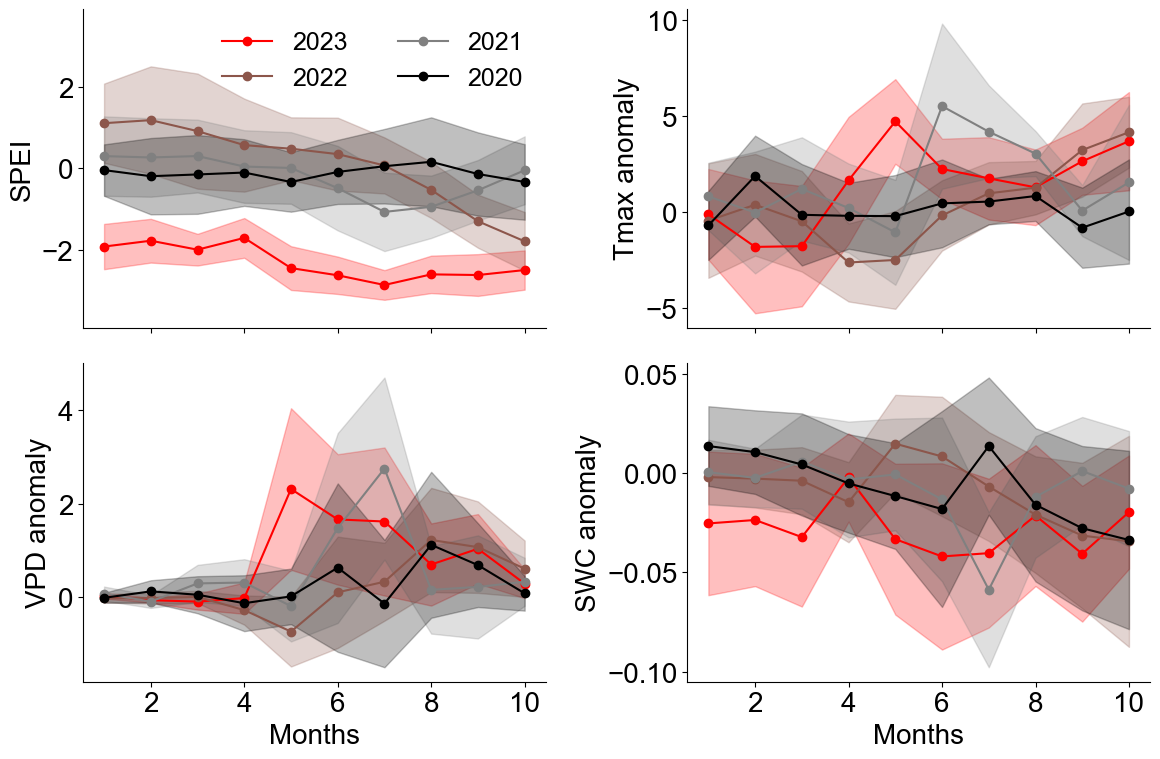

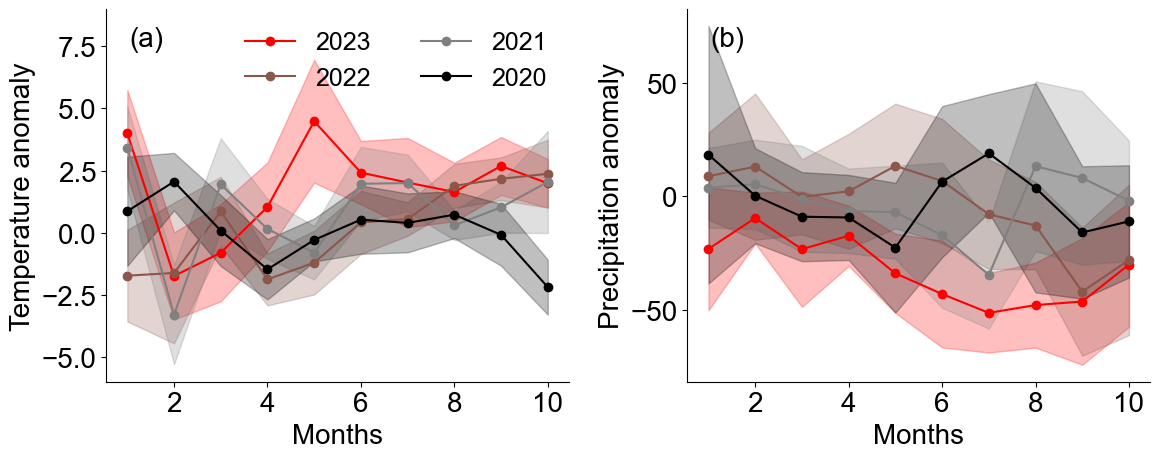

In [ ]:
# 读取绘图数据
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

if __name__ == '__main__':
    workDir = 'D:/Documents/outfile/climate_anomaly_5eco'
    os.chdir(workDir)
    # mean
    climate_ano_20_mean = 'climate_anomaly_20_mean.csv'
    climate_ano_21_mean = 'climate_anomaly_21_mean.csv'
    climate_ano_22_mean = 'climate_anomaly_22_mean.csv'
    climate_ano_23_mean = 'climate_anomaly_23_mean.csv'
    # std
    climate_ano_20_std = 'climate_anomaly_20_std.csv'
    climate_ano_21_std = 'climate_anomaly_21_std.csv'
    climate_ano_22_std = 'climate_anomaly_22_std.csv'
    climate_ano_23_std = 'climate_anomaly_23_std.csv'

    # read csv
    climate_20_mean_df = pd.read_csv(climate_ano_20_mean)
    climate_21_mean_df = pd.read_csv(climate_ano_21_mean)
    climate_22_mean_df = pd.read_csv(climate_ano_22_mean)
    climate_23_mean_df = pd.read_csv(climate_ano_23_mean)
    # std
    climate_20_std_df = pd.read_csv(climate_ano_20_std)
    climate_21_std_df = pd.read_csv(climate_ano_21_std)
    climate_22_std_df = pd.read_csv(climate_ano_22_std)
    climate_23_std_df = pd.read_csv(climate_ano_23_std)

    # 将时间转换为时间格式
    climate_20_mean_df['time'] = pd.to_datetime(climate_20_mean_df['time'])
    climate_21_mean_df['time'] = pd.to_datetime(climate_21_mean_df['time'])
    climate_22_mean_df['time'] = pd.to_datetime(climate_22_mean_df['time'])
    climate_23_mean_df['time'] = pd.to_datetime(climate_23_mean_df['time'])
    # std
    climate_20_std_df['time'] = pd.to_datetime(climate_20_std_df['time'])
    climate_21_std_df['time'] = pd.to_datetime(climate_21_std_df['time'])
    climate_22_std_df['time'] = pd.to_datetime(climate_22_std_df['time'])
    climate_23_std_df['time'] = pd.to_datetime(climate_23_std_df['time'])
    
    
    # 选取当年1-12月数据
    mask = (climate_20_mean_df["time"]>='2020-01-01') & (climate_20_mean_df["time"]<='2020-10-31')
    climate_20_mean_df = climate_20_mean_df.loc[mask]
    mask = (climate_21_mean_df["time"]>='2021-01-01') & (climate_21_mean_df["time"]<='2021-10-31')
    climate_21_mean_df = climate_21_mean_df.loc[mask]
    mask = (climate_22_mean_df["time"]>='2022-01-01') & (climate_22_mean_df["time"]<='2022-10-31')
    climate_22_mean_df = climate_22_mean_df.loc[mask]
    mask = (climate_23_mean_df["time"]>='2023-01-01') & (climate_23_mean_df["time"]<='2023-10-31')
    climate_23_mean_df = climate_23_mean_df.loc[mask]
    # std
    mask = (climate_20_std_df["time"]>='2020-01-01') & (climate_20_std_df["time"]<='2020-10-31')
    climate_20_std_df = climate_20_std_df.loc[mask]
    mask = (climate_21_std_df["time"]>='2021-01-01') & (climate_21_std_df["time"]<='2021-10-31')
    climate_21_std_df = climate_21_std_df.loc[mask]
    mask = (climate_22_std_df["time"]>='2022-01-01') & (climate_22_std_df["time"]<='2022-10-31')
    climate_22_std_df = climate_22_std_df.loc[mask]
    mask = (climate_23_std_df["time"]>='2023-01-01') & (climate_23_std_df["time"]<='2023-10-31')
    climate_23_std_df = climate_23_std_df.loc[mask]
    ''''''

    # 绘图
    #fig, axes = plt.subplots(2, 3, figsize=(14, 8))
    # 字体字号
    # 2行2列
    fig, axes = plt.subplots(2, 2, figsize=(12, 8))
    plt.rcParams['font.sans-serif'] = ['Arial']
    plt.rcParams['font.size'] = 20

    # 绘制spei
    axes[0,0].plot(climate_23_mean_df['month'], climate_23_mean_df['spei'], color='#ff0000', label='2023', marker='o')
    axes[0,0].plot(climate_22_mean_df['month'], climate_22_mean_df['spei'], color='#8C564B', label='2022', marker='o')
    axes[0,0].plot(climate_21_mean_df['month'], climate_21_mean_df['spei'], color='grey', label='2021', marker='o')
    axes[0,0].plot(climate_20_mean_df['month'], climate_20_mean_df['spei'], color='black', label='2020', marker='o')
    axes[0,0].fill_between(climate_23_mean_df['month'], climate_23_mean_df['spei']-climate_23_std_df['spei'], climate_23_mean_df['spei']+climate_23_std_df['spei'], color='#ff0000', alpha=0.25)
    axes[0,0].fill_between(climate_22_mean_df['month'], climate_22_mean_df['spei']-climate_22_std_df['spei'], climate_22_mean_df['spei']+climate_22_std_df['spei'], color='#8C564B', alpha=0.25)
    axes[0,0].fill_between(climate_21_mean_df['month'], climate_21_mean_df['spei']-climate_21_std_df['spei'], climate_21_mean_df['spei']+climate_21_std_df['spei'], color='grey', alpha=0.25)
    axes[0,0].fill_between(climate_20_mean_df['month'], climate_20_mean_df['spei']-climate_20_std_df['spei'], climate_20_mean_df['spei']+climate_20_std_df['spei'], color='black', alpha=0.25)

    axes[0,0].set_ylabel('SPEI')
    # 删除x轴ticklabel
    axes[0,0].set_xticklabels([])
    axes[0,0].set_xlabel('')
    axes[0,0].set_ylim(-3.9, 3.9)
    axes[0,0].set_yticks([-2, 0, 2])
    # 删除右侧和上侧边框
    axes[0,0].spines['right'].set_visible(False)
    axes[0,0].spines['top'].set_visible(False)
    axes[0,0].legend(ncol=2, loc='upper right', fontsize=18, frameon=False,facecolor='none')
    # 删除图例边框和背景
    #axes[0,0].legend().set_visible(False)
    # x轴旋转45°
    # 保存
    
    # 关闭
    #plt.close()

    # 绘制第二幅图t2mmax
    axes[0,1].plot(climate_23_mean_df['month'], climate_23_mean_df['t2mmax'], color='#ff0000', label='2023', marker='o')
    axes[0,1].plot(climate_22_mean_df['month'], climate_22_mean_df['t2mmax'], color='#8C564B', label='2022', marker='o')
    axes[0,1].plot(climate_21_mean_df['month'], climate_21_mean_df['t2mmax'], color='grey', label='2021', marker='o')
    axes[0,1].plot(climate_20_mean_df['month'], climate_20_mean_df['t2mmax'], color='black', label='2020', marker='o')
    # 置信区间
    axes[0,1].fill_between(climate_23_mean_df['month'], climate_23_mean_df['t2mmax']-climate_23_std_df['t2mmax'], climate_23_mean_df['t2mmax']+climate_23_std_df['t2mmax'], color='#ff0000', alpha=0.25)
    axes[0,1].fill_between(climate_22_mean_df['month'], climate_22_mean_df['t2mmax']-climate_22_std_df['t2mmax'], climate_22_mean_df['t2mmax']+climate_22_std_df['t2mmax'], color='#8C564B', alpha=0.25)
    axes[0,1].fill_between(climate_21_mean_df['month'], climate_21_mean_df['t2mmax']-climate_21_std_df['t2mmax'], climate_21_mean_df['t2mmax']+climate_21_std_df['t2mmax'], color='grey', alpha=0.25)
    axes[0,1].fill_between(climate_20_mean_df['month'], climate_20_mean_df['t2mmax']-climate_20_std_df['t2mmax'], climate_20_mean_df['t2mmax']+climate_20_std_df['t2mmax'], color='black', alpha=0.25)
    axes[0,1].set_ylabel('Tmax anomaly')
    axes[0,1].set_xlabel('')
    axes[0,1].set_xticklabels([])
    axes[0,1].set_yticks([-5, 0, 5, 10])
    # 删除右侧和上侧边框
    axes[0,1].spines['right'].set_visible(False)
    axes[0,1].spines['top'].set_visible(False)
    #plt.savefig('D:/Documents/Fig/t2mmax_20_23_sequence_test2.png', dpi=300, bbox_inches='tight')
    #plt.close()

    # 绘制vpd
    axes[1,0].plot(climate_23_mean_df['month'], climate_23_mean_df['vpd'], color='#ff0000', label='2023', marker='o')
    axes[1,0].plot(climate_22_mean_df['month'], climate_22_mean_df['vpd'], color='#8C564B', label='2022', marker='o')
    axes[1,0].plot(climate_21_mean_df['month'], climate_21_mean_df['vpd'], color='grey', label='2021', marker='o')
    axes[1,0].plot(climate_20_mean_df['month'], climate_20_mean_df['vpd'], color='black', label='2020', marker='o')
    # 置信区间
    axes[1,0].fill_between(climate_23_mean_df['month'], climate_23_mean_df['vpd']-climate_23_std_df['vpd'], climate_23_mean_df['vpd']+climate_23_std_df['vpd'], color='#ff0000', alpha=0.25)
    axes[1,0].fill_between(climate_22_mean_df['month'], climate_22_mean_df['vpd']-climate_22_std_df['vpd'], climate_22_mean_df['vpd']+climate_22_std_df['vpd'], color='#8C564B', alpha=0.25)
    axes[1,0].fill_between(climate_21_mean_df['month'], climate_21_mean_df['vpd']-climate_21_std_df['vpd'], climate_21_mean_df['vpd']+climate_21_std_df['vpd'], color='grey', alpha=0.25)
    axes[1,0].fill_between(climate_20_mean_df['month'], climate_20_mean_df['vpd']-climate_20_std_df['vpd'], climate_20_mean_df['vpd']+climate_20_std_df['vpd'], color='black', alpha=0.25)
    axes[1,0].set_ylabel('VPD anomaly')
    axes[1,0].set_xlabel('Months')
    axes[1,0].set_yticks([0, 2, 4])
    # 删除右侧和上侧边框
    axes[1,0].spines['right'].set_visible(False)
    axes[1,0].spines['top'].set_visible(False)
    #plt.savefig('D:/Documents/Fig/vpd_20_23_sequence_test2.png', dpi=300, bbox_inches='tight')
    #plt.close()
    

    # 绘制sm
    axes[1,1].plot(climate_23_mean_df['month'], climate_23_mean_df['sm'], color='#ff0000', label='2023', marker='o')
    axes[1,1].plot(climate_22_mean_df['month'], climate_22_mean_df['sm'], color='#8C564B', label='2022', marker='o')
    axes[1,1].plot(climate_21_mean_df['month'], climate_21_mean_df['sm'], color='grey', label='2021', marker='o')
    axes[1,1].plot(climate_20_mean_df['month'], climate_20_mean_df['sm'], color='black', label='2020', marker='o')
    # 置信区间
    axes[1,1].fill_between(climate_23_mean_df['month'], climate_23_mean_df['sm']-climate_23_std_df['sm'], climate_23_mean_df['sm']+climate_23_std_df['sm'], color='#ff0000', alpha=0.25)
    axes[1,1].fill_between(climate_22_mean_df['month'], climate_22_mean_df['sm']-climate_22_std_df['sm'], climate_22_mean_df['sm']+climate_22_std_df['sm'], color='#8C564B', alpha=0.25)
    axes[1,1].fill_between(climate_21_mean_df['month'], climate_21_mean_df['sm']-climate_21_std_df['sm'], climate_21_mean_df['sm']+climate_21_std_df['sm'], color='grey', alpha=0.25)
    axes[1,1].fill_between(climate_20_mean_df['month'], climate_20_mean_df['sm']-climate_20_std_df['sm'], climate_20_mean_df['sm']+climate_20_std_df['sm'], color='black', alpha=0.25)
    axes[1,1].set_ylabel('SWC anomaly')
    axes[1,1].set_xlabel('Months')
    axes[1,1].set_yticks([-0.1, -0.05, 0, 0.05])
    # 删除右侧和上侧边框
    axes[1,1].spines['right'].set_visible(False)
    axes[1,1].spines['top'].set_visible(False)
    plt.tight_layout()
    plt.savefig('D:/Documents/Fig/.png', dpi=300, bbox_inches='tight' )
    #plt.close()
    
    #plt.close()
    
    # 绘制温度和降水
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))
    plt.rcParams['font.sans-serif'] = ['Arial']
    plt.rcParams['font.size'] = 20
    # 绘制温度
    axes[0].plot(climate_23_mean_df['month'], climate_23_mean_df['t2m'], color='#ff0000', label='2023', marker='o')
    axes[0].plot(climate_22_mean_df['month'], climate_22_mean_df['t2m'], color='#8C564B', label='2022', marker='o')
    axes[0].plot(climate_21_mean_df['month'], climate_21_mean_df['t2m'], color='grey', label='2021', marker='o')
    axes[0].plot(climate_20_mean_df['month'], climate_20_mean_df['t2m'], color='black', label='2020', marker='o')
    # 置信区间
    axes[0].fill_between(climate_23_mean_df['month'], climate_23_mean_df['t2m']-climate_23_std_df['t2m'], climate_23_mean_df['t2m']+climate_23_std_df['t2m'], color='#ff0000', alpha=0.25)
    axes[0].fill_between(climate_22_mean_df['month'], climate_22_mean_df['t2m']-climate_22_std_df['t2m'], climate_22_mean_df['t2m']+climate_22_std_df['t2m'], color='#8C564B', alpha=0.25)
    axes[0].fill_between(climate_21_mean_df['month'], climate_21_mean_df['t2m']-climate_21_std_df['t2m'], climate_21_mean_df['t2m']+climate_21_std_df['t2m'], color='grey', alpha=0.25)
    axes[0].fill_between(climate_20_mean_df['month'], climate_20_mean_df['t2m']-climate_20_std_df['t2m'], climate_20_mean_df['t2m']+climate_20_std_df['t2m'], color='black', alpha=0.25)
    axes[0].set_ylabel('Temperature anomaly')
    axes[0].set_xlabel('Months')
    axes[0].set_ylim(-6, 9)

    # 绘制降水
    axes[1].plot(climate_23_mean_df['month'], climate_23_mean_df['tp'], color='#ff0000', label='2023', marker='o')
    axes[1].plot(climate_22_mean_df['month'], climate_22_mean_df['tp'], color='#8C564B', label='2022', marker='o')
    axes[1].plot(climate_21_mean_df['month'], climate_21_mean_df['tp'], color='grey', label='2021', marker='o')
    axes[1].plot(climate_20_mean_df['month'], climate_20_mean_df['tp'], color='black', label='2020', marker='o')

    # 置信区间
    axes[1].fill_between(climate_23_mean_df['month'], climate_23_mean_df['tp']-climate_23_std_df['tp'], climate_23_mean_df['tp']+climate_23_std_df['tp'], color='#ff0000', alpha=0.25)
    axes[1].fill_between(climate_22_mean_df['month'], climate_22_mean_df['tp']-climate_22_std_df['tp'], climate_22_mean_df['tp']+climate_22_std_df['tp'], color='#8C564B', alpha=0.25)
    axes[1].fill_between(climate_21_mean_df['month'], climate_21_mean_df['tp']-climate_21_std_df['tp'], climate_21_mean_df['tp']+climate_21_std_df['tp'], color='grey', alpha=0.25)
    axes[1].fill_between(climate_20_mean_df['month'], climate_20_mean_df['tp']-climate_20_std_df['tp'], climate_20_mean_df['tp']+climate_20_std_df['tp'], color='black', alpha=0.25)
    axes[1].set_ylabel('Precipitation anomaly')
    axes[1].set_xlabel('Months')
    # 删除右侧和上侧边框
    axes[0].spines['right'].set_visible(False)
    axes[0].spines['top'].set_visible(False)
    axes[1].spines['right'].set_visible(False)
    axes[1].spines['top'].set_visible(False)
    # 添加文本
    axes[0].text(0.05, 0.9, '(a)', transform=axes[0].transAxes, fontsize=20)
    axes[1].text(0.05, 0.9, '(b)', transform=axes[1].transAxes, fontsize=20)
    # 添加图例
    axes[0].legend(ncol=2, loc='upper right', fontsize=18, frameon=False,facecolor='none')
    plt.tight_layout()
    plt.savefig('D:/Documents/Fig/t2m_tp_20_23_ano_o_sequence.png', dpi=300, bbox_inches='tight' )


## difference in distribution

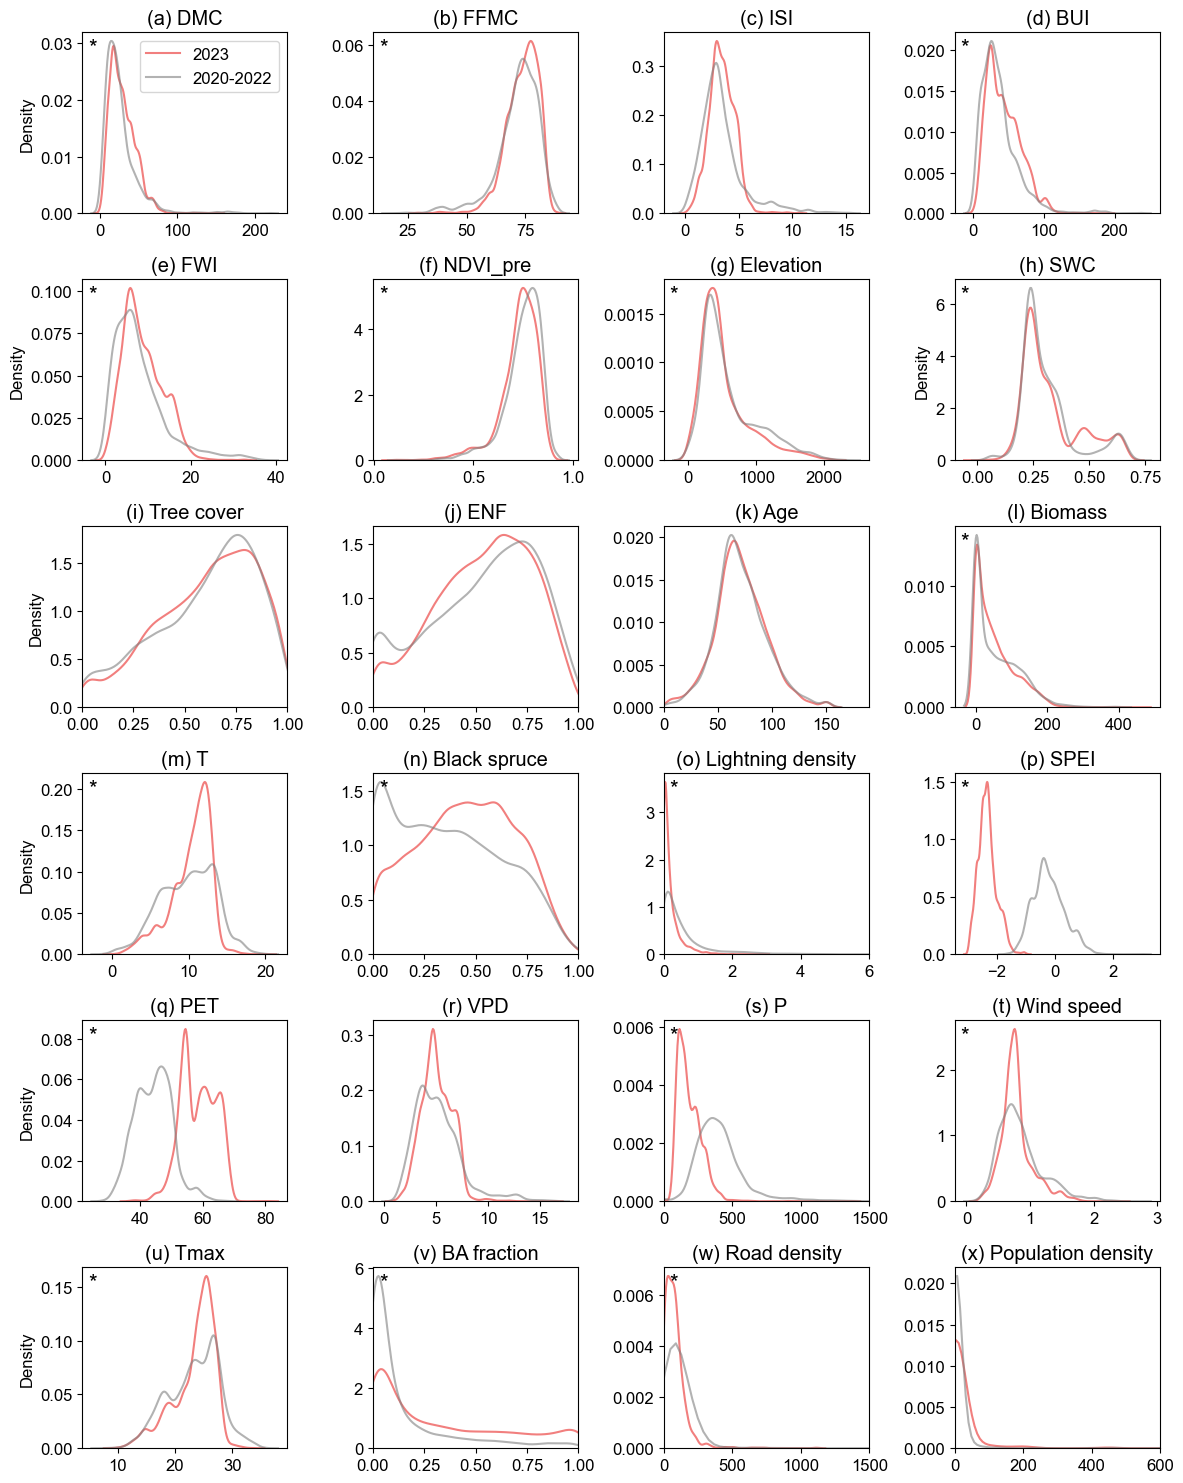

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy.stats as stats
import os

if __name__ == '__main__':
    workDir = 'D:/Documents/outfile/RF_input_newmodel_2505/response_add_analysis'
    os.chdir(workDir)
    #data = pd.read_csv('RF_input_TCDFEFEBAAGEDEMSPEIVPDT2MTPSWCPEPET0_20212223fwi.csv')
    data = pd.read_csv('RF_input_BAfwiNDVITCEBAAgeDEMSPEISMT2mTPPETVPDPETRoaddensityPopuENFBiomassWSTmaxLightningLandSpeciesSnowCanopyheight.csv')
    # 删除nan行
    data_2023 = data[data['YR'] == 2023]
    data_hist = data[data['YR'] != 2023]    

    var_list = ['DMC', 'FFMC', 'ISI', 'BUI', 'FWI', 'NDVI_pre', 'DEM', 'SWC', "TC", "EF", "age", "Biomass", "T2M", "EBA", "Lightning", 
    "SPEI", "PET", "VPD", "TP", "Wind", "T2Mmax", "BA_fraction", "Roaddensity", "Popu"]
    id_list = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']
    
    # 绘制变量分布差异
    plt.rcParams['font.sans-serif'] = ['Arial']
    plt.rcParams['font.size'] = 12
    fig, ax = plt.subplots(6, 4, figsize=(12, 15))
    for i, var in enumerate(var_list):
        var_2023 = data_2023[var]
        var_hist = data_hist[var]
        # 删除数据中的nan
        var_2023 = var_2023.dropna()
        var_hist = var_hist.dropna()
        if var == 'T2Mmax':
            var_2023 = var_2023 - 273.15
            var_hist = var_hist - 273.15
        # students t test 
        t_stat, p_value = stats.ttest_ind(var_2023, var_hist)
        # 绘制核密度分布曲线
        sns.kdeplot(var_2023, ax=ax[i//4, i%4], label='2023', color='#E92A28', alpha=0.6)
        sns.kdeplot(var_hist, ax=ax[i//4, i%4], label='2020-2022', color='gray', alpha=0.6) 
        if p_value < 0.05:
            ax[i//4, i%4].text(0.05, 0.92, '*', ha='center', va='center', transform=ax[i//4, i%4].transAxes, fontsize=16)
        # set title
        ax[i//4, i%4].set_title('(' + id_list[i] + ') ' + var)
        # set x label
        ax[i//4, i%4].set_xlabel('')
        # set y label
        ax[i//4, i%4].set_ylabel('')
        if i == 0:
            ax[i//4, i%4].legend(loc='upper right')
        if var == 'DEM':
            ax[i//4, i%4].set_title('(' + id_list[i] + ') ' + "Elevation")
        if var == 'TC':
            ax[i//4, i%4].set_title('(' + id_list[i] + ') ' + "Tree cover")
            ax[i//4, i%4].set_xlim(0, 1)
            ax[i//4, i%4].set_ylabel('Density')
        if var == 'EF':
            ax[i//4, i%4].set_title('(' + id_list[i] + ') ' + "ENF")
            ax[i//4, i%4].set_xlim(0, 1)
        if var == 'T2M':
            ax[i//4, i%4].set_title('(' + id_list[i] + ') ' + "T")
            ax[i//4, i%4].set_ylabel('Density')
        if var == 'EBA':
            ax[i//4, i%4].set_title('(' + id_list[i] + ') ' + "Black spruce")
            ax[i//4, i%4].set_xlim(0, 1)
        if var == 'Lightning':
            ax[i//4, i%4].set_title('(' + id_list[i] + ') ' + "Lightning density")
            ax[i//4, i%4].set_xlim(0, 6)
        if var == 'T2Mmax':
            ax[i//4, i%4].set_title('(' + id_list[i] + ') ' + "Tmax")
            ax[i//4, i%4].set_ylabel('Density')
            ax[i//4, i%4].text(0.05, 0.92, '*', ha='center', va='center', transform=ax[i//4, i%4].transAxes, fontsize=16)
        if var == 'BA_fraction':
            ax[i//4, i%4].set_title('(' + id_list[i] + ') ' + "BA fraction")
            ax[i//4, i%4].set_xlim(0, 1)
        if var == 'Roaddensity':
            ax[i//4, i%4].set_title('(' + id_list[i] + ') ' + "Road density")
            ax[i//4, i%4].set_xlim(0, 1500)
        if var == 'Popu':
            ax[i//4, i%4].set_title('(' + id_list[i] + ') ' + "Population density")
            ax[i//4, i%4].set_xlim(0, 600)
        if var == 'age':
            ax[i//4, i%4].set_title('(' + id_list[i] + ') ' + "Age")
            ax[i//4, i%4].set_xlim(0, 190)
        if var == 'Wind':
            ax[i//4, i%4].set_title('(' + id_list[i] + ') ' + "Wind speed")
        if var == 'VPD':
            ax[i//4, i%4].set_title('(' + id_list[i] + ') ' + "VPD")
        if var == 'TP':
            ax[i//4, i%4].set_title('(' + id_list[i] + ') ' + "P")
            ax[i//4, i%4].set_xlim(0, 1500)
        if var == 'DMC':
            ax[i//4, i%4].set_ylabel('Density')
        if var == 'PET':
            ax[i//4, i%4].set_ylabel('Density')
        if var == 'SWC':
            ax[i//4, i%4].set_ylabel('Density')
        else:
            ax[i//4, i%4].set_ylabel('')      
           

    # 设置y轴标题        
    ax[0, 0].set_ylabel('Density')
    ax[1, 0].set_ylabel('Density')
    ax[2, 0].set_ylabel('Density')
    ax[3, 0].set_ylabel('Density')
    ax[4, 0].set_ylabel('Density')
    ax[5, 0].set_ylabel('Density')
    
    
    plt.tight_layout()
    plt.savefig('D:/Documents/Fig/RF_input_2023_202022_density.png', dpi=300)
    plt.show()